#Step 1
Environment Setup

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp /content/drive/MyDrive/14795/SAML-D.csv /content
!git clone https://github.com/Yichuan0712/14795-AML.git

Cloning into '14795-AML'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 262 (delta 20), reused 35 (delta 9), pack-reused 215 (from 1)
Receiving objects: 100% (262/262), 4.51 MiB | 14.25 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [2]:
import os
os.chdir('/content/14795-AML')

In [3]:
!git pull origin main

From https://github.com/Yichuan0712/14795-AML
 * branch            main       -> FETCH_HEAD
Already up to date.


#Step 2
Test Data Preprocess

In [4]:
from preprocessor.preprocessor import preprocess, get_X_y_scaler
test_data = preprocess('/content/14795-AML/demo/test0.02.csv')
X_test, y_test, _ = get_X_y_scaler(test_data)

#Step 3
Test Data Encode

In [5]:
from encoder.autoencoder import infer_autoencoder
X_encoder = infer_autoencoder(X_test, encoder_path='/content/14795-AML/demo/encoder_model_demo.h5')

5941/5941 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [6]:
import pandas as pd
encode_data = pd.concat([X_encoder, y_test.reset_index(drop=True)], axis=1)
X, y, _ = get_X_y_scaler(encode_data)

#Step 4
Test Data Infer

In [7]:
from detector.XGBoost import infer_xgb
y_pred1 = infer_xgb(X, model_path='/content/14795-AML/demo/xgb_model1_demo.joblib')
y_pred2 = infer_xgb(X, model_path='/content/14795-AML/demo/xgb_model1_demo.joblib')
y_pred3 = infer_xgb(X, model_path='/content/14795-AML/demo/xgb_model1_demo.joblib')

In [8]:
import numpy as np
from scipy.stats import mode

predictions = np.vstack([y_pred1, y_pred2, y_pred3])

final_predictions, _ = mode(predictions, axis=0)


final_predictions = final_predictions.flatten()

In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, final_predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.45%


Confusion Matrix:
[[179376  10448]
 [   110    164]]


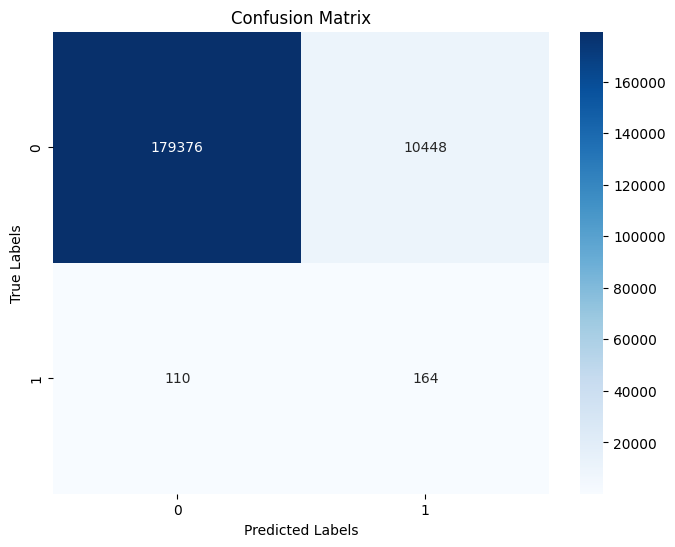

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, final_predictions)

print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#Step 5
Reporter

In [11]:
!pip install transformers llama-index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.8/176.8 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing inst

In [12]:
from reporter.reporter import get_nth_money_laundering, clean_data, run_risk_assessment_chatbot, llama_init

tokenizer, model, device = llama_init()

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [13]:
ml_df = get_nth_money_laundering(test_data, final_predictions, 0)
alert_message = clean_data(ml_df)

In [14]:
run_risk_assessment_chatbot(tokenizer,
              model,
              device,
              alert_message,
              system_prompt_path='/content/14795-AML/reporter/system_prompt.txt',
              report_template_path='/content/14795-AML/reporter/report_template.txt')

Welcome to the Anti-Money Laundering Risk Assessment Bot.
We have received an alert message, and the initial report will be generated shortly.
You can review the report and provide feedback for modifications.
Type 'exit' at any time to terminate the session.

Bot: Here is the initial report:
Money Laundering Risk Assessment Report

1. Transaction Overview
Transaction Date: 2023-8-16 19:53:25
Transaction Amount: 3117.45 GBP
Payment Type: Cheque

2. Involved Accounts
Sender Account: 9588768529.0 GBP
Receiver Account: 9702680613.0 GBP

3. Bank Locations
Sender's Bank Location: UK
Receiver's Bank Location: UK

4. Currencies Used
Payment Currency: GBP
Received Currency: GBP

5. Risk Indicators
Laundering Type: Normal Group
Same Country Transaction: True

6. Comments
The transaction involves a high-risk country (UK) and a same-country transaction, which may indicate a higher likelihood of money laundering. Additionally, the large amount transferred (3117.45 GBP) in a single transaction may a